# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
# Daniel Dolberg - 324064872
# dolbergdani@gmail.com

# Details Student 2:
# Mor Cohen - 313201246
# morxmor.c@gmail.com

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

#!pip install plotly
#!pip install wordcloud

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [11]:
#we will firstly import some EDA modules
import plotly.express as px
from wordcloud import WordCloud

## Data Visualizatio
### mama mia

In [12]:
# YOUR CODE HERE


#### firstly we will replace the gatecorical column with ones and zeros
female = 0
male = 1

In [13]:
#Male = 1, Female = 0

df_full = df_train.copy()
df_full = df_full.append(df_test)

df_train["gender"] = df_train["gender"].astype('category')
replace_m={'m': 1, 'f': 0}
df_train.replace(replace_m, inplace = True)

df_train

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",1
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,1
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,0
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",1
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,0
...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,1
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,1
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,1
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",0


now we will get rid of all the commas, full stops and extra spaces
we will also transform the text into an array of the words in story

In [14]:
replacements = ['.',',','?','!',"'",'"',"(",")","[","]"]

for i in range(df_train.shape[0]):
    #remove commas,full stops,question marks a '!'
    row = df_train['story'][i]
    #row = row.replace('.','')
    #row = row.replace(',','')
    for char in replacements:
        row = row.replace(char,'')
    
    df_train['story'][i] = row.split(" ")
    

df_train['story'][0]

['כשחבר',
 'הזמין',
 'אותי',
 'לחול',
 'לא',
 'באמת',
 'חשבתי',
 'שזה',
 'יקרה',
 'פשוט',
 'אמרתי',
 'לו',
 'כן',
 'ותיארתי',
 'לעצני',
 'שזה',
 'יתבטל',
 'אחרי',
 'שבועיים',
 'בערך',
 'אני',
 'מקבל',
 'טלפוןם',
 'ממנו',
 'שומע',
 'מצאתי',
 'אחלה',
 'מקודות',
 'שנוטכל',
 'טייל',
 'בהם',
 'ואז',
 'הבנתי',
 'שזה',
 'הולך',
 'לקרות',
 'התחלתי',
 'להתארגןם',
 'על',
 'דברים',
 'ציוד',
 'להליכה',
 'תיקים',
 'בגדים',
 'חמים',
 'כסף',
 'ודרכון',
 'מעודכן',
 'לאחר',
 'תכנונים',
 'נפגשנו',
 'בשדה',
 'הוא',
 'הביא',
 'לי',
 'את',
 'אחד',
 'מהתיקים',
 'שלו',
 'כי',
 'לי',
 'אין',
 'תיק',
 'טוב',
 'לטיולים',
 'ועלינו',
 'למטוס',
 'לאיטליה',
 'בטיסה',
 'עצמה',
 'לא',
 'הצלחתי',
 'לישון',
 'היה',
 'ילד',
 'קטן',
 'שבכה',
 'כל',
 'הדרך',
 'מעצבן',
 'כשהגענו',
 'הלכנו',
 'ישר',
 'לסוכנות',
 'השכרת',
 'הרכב',
 'ולקחנו',
 'את',
 'הרכב',
 'שהזמנו',
 'מראש',
 'סיטרואל',
 '4C',
 'בצבע',
 'סגול',
 'כי',
 'זה',
 'מה',
 'שנשאר',
 'חצי',
 'קראנו',
 'לה',
 'עלינו',
 'על',
 'חצי',
 'והתחלנו',
 'את',
 'המסע',
 'לכ

### now lets try to find some differences between stories by men and women
firstly let's see if there is difference in word count

In [15]:
#let's add a new category called "word count"
num_of_words = [len(text) for text in df_train["story"]]
df_train["Number of Words"] = num_of_words

<Axes: >

Text(0.5, 1.0, 'amount of words per story with no regard to gender')

Text(0.5, 0, 'Number of Words')

Text(0, 0.5, 'Frequency')

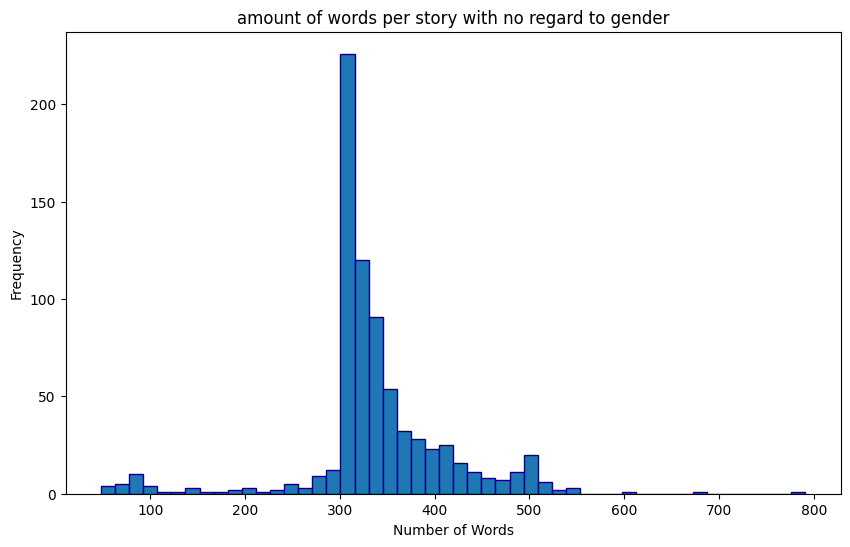

<Axes: >

Text(0.5, 1.0, 'amount of words per storys of men')

Text(0.5, 24.0, 'Number of Words')

Text(24.000000000000007, 0.5, 'Frequency')

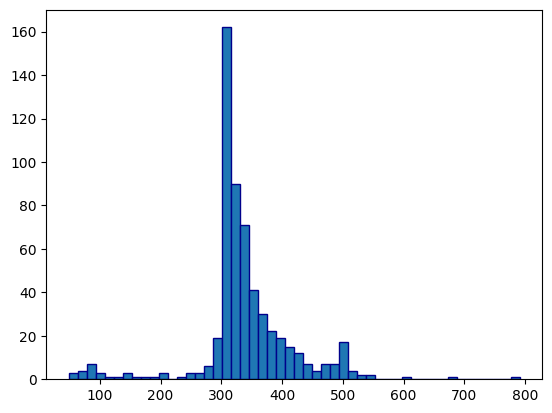

<Axes: >

Text(0.5, 1.0, 'amount of words per storys of women')

Text(0.5, 24.0, 'Number of Words')

Text(24.000000000000007, 0.5, 'Frequency')

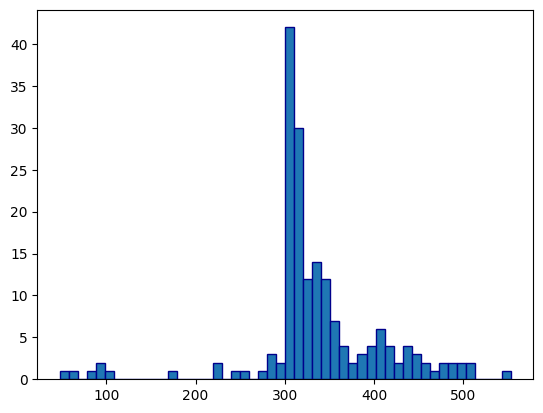

In [16]:
df_male = df_train[df_train["gender"] == 1]
df_female = df_train[df_train["gender"] == 0]


fig, ax = plt.subplots(figsize=(10,6))
df_train["Number of Words"].hist(bins=50,density=False,rwidth=1,edgecolor='DarkBlue',grid=False)
ax.set_title("amount of words per story with no regard to gender")
ax.set_xlabel("Number of Words")
ax.set_ylabel("Frequency")
plt.show()

df_male["Number of Words"].hist(bins=50,density=False,rwidth=1,edgecolor='DarkBlue',grid=False)
ax.set_title("amount of words per storys of men")
ax.set_xlabel("Number of Words")
ax.set_ylabel("Frequency")
plt.show()

df_female["Number of Words"].hist(bins=50,density=False,rwidth=1,edgecolor='DarkBlue',grid=False)
ax.set_title("amount of words per storys of women")
ax.set_xlabel("Number of Words")
ax.set_ylabel("Frequency")
plt.show()

### Mechinge Learning

In [18]:
max_samps = df_train.shape[0]

models = {
        'LogisticRegression': {
        'vectorizer': [TfidfVectorizer(min_df=5,max_df=max_samps],
        'vectorizer__max_features': [None, 2000],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [LogisticRegression(class_weight='balanced')],
        'classifier__penalty': ['l1','l2']
        },
        'MultinomialNaiveBayes': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=max_samps)],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False)],
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.01],
        },
        'Perceptron': {
        'vectorizer': [TfidfVectorizer(min_df=5, max_df=max_samps)],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False)],
        'classifier': [Perceptron()],
        'classifier__penalty': ['l1','l2'],
        },
        'SVC': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=max_samps), TfidfVectorizer()],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1, 1), (1, 2),(1,3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [svm.SVC()],
        'classifier__kernel': ['linear','rbf','sigmoid'],
        'classifier__C': [0.01, 1, 10],
        'classifier__tol': [0.001],
        },
        'KNN': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=753), TfidfVectorizer()],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1, 1), (1, 2),(1,3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [5, 50],
        'classifier__p': [1, 2]
        },
        'DecisionTree': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=max_samps)],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1,1),(1,2),(1,3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [DecisionTreeClassifier()],
        },
}

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2439323558.py, line 5)

In [19]:
# Machine learning model fitting.

X = df_train["story"]
y = df_train["gender"]

# Create a pipeline
pipeline = Pipeline([
    ('vectorizer', None),
    ('scaler', None),
    ('classifier', None)
])

# We're using the KFold cross-validation method to improve our models' accuracies
cv = model_selection.KFold(n_splits = 5)

# Define F1 macro scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Perform grid search over the models_params dictionary
results = []
for model_name, model_params in model_params.items():
    print(f"\n\n\nGrid search for {model_name}:\n")
    clf = GridSearchCV(pipeline, model_params, cv=cv, scoring=f1_scorer, verbose=1,n_jobs=10)
    clf.fit(X, y)

    # Get the best hyperparameters
    best_params = clf.best_params_

    # Perform cross-validation with the specified scoring method
    cv_scores = cross_val_score(clf.best_estimator_, X, y, scoring=f1_scorer, cv=10)

    # Calculate the mean of cv_scores
    cv_mean_score = np.mean(cv_scores)

    # Store the results
    result = {
        "model_name": model_name,
        "best_params": best_params,
        "cv_mean_score": cv_mean_score
    }
    results.append(result)

    # Print the results for the current clf
    print(f"Best hyperparameters:\n{best_params}")
    print(f"Cross-validated F1 macro mean score:\n{cv_mean_score:.4f}") 
    print("\n*********************************************************\n")

# Print the final results
for result in results:
    print(f"Model:\n{result['model_name']}")
    print(f"Best hyperparameters:\n{result['best_params']}")
    print(f"Cross-validated F1 macro mean score:\n{result['cv_mean_score']:.4f}") 
    print("\n*********************************************************\n")

NameError: name 'make_scorer' is not defined

In [ ]:
df_res = pd.DataFrame(results)
df_res.drop("best_params", axis = 1)

In [20]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=753, max_features=2000, min_df=5, ngram_range = (1, 1))),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(penalty = 'l2', class_weight='balanced'))
])

# # Fit the pipeline to the training data with the best estimator
pipeline.fit(df_train['story'].apply(text_preprocessor), y) # y is binary (1 for female)

# Make predictions on the test data
y_pred_test = pipeline.predict(df_test['story'].apply(text_preprocessor))

# Sample first and last 5 rows of df_test and predict on them
df_predicted = df_test.copy()
df_predicted['predicted_category'] = y_pred_test
df_predicted['predicted_category'] = pd.Series(y_pred_test).map({0: 'm', 1: 'f'})

# Print it out
df_predicted

NameError: name 'LogisticRegression' is not defined

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [ ]:
df_predicted.to_csv('classification_results.csv',index=False)